# Exploratory Data Analysis

In this notebook we'll do some exploratory data analysis over our dataset. However, since we don't have our features created yet, we cannot do much at this point. In addition, when we create them, we won't be able to extract many insights because of the nature of text-based features. For this reason, only a shallow analysis will be done at this point.

For the plots we have used `seaborn` and `altair`. `altair` is a package which allows us to plot graphics with a simple grammar as we would do in ggplot2 or Tableau. It also provides easy-to-make interactive plots. For further information please visit the project site: https://altair-viz.github.io/.

To install it, please type this command in the shell:

`! conda install -c conda-forge altair vega_datasets notebook vega`

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt
print(alt.__version__)
# alt.renderers.enable("notebook")

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")
import os
from os import path


4.0.1


Loading the dataset:

In [37]:
d = os.getcwd()
#df_path2 = path.join(d, 'News_dataset.csv')
df_path2 = path.join(d, 'Train_all_types.csv')
print(df_path2)
df = pd.read_csv(df_path2, sep=',')

C:\Users\Jiuning\PycharmProjects\Latest-News-Classifier-master\0. Latest News Classifier\02. Exploratory Data Analysis\Train_all_types.csv


In [38]:
df.head()
print(df.__len__())

1306


### Number of articles in each category

In [39]:
bars = alt.Chart(df).mark_bar(size=50).encode(
    x=alt.X("Complexity_level"),
    y=alt.Y("count():Q", axis=alt.Axis(title='Number of Nodes')),
    tooltip=[alt.Tooltip('count()', title='Number of Nodes'), 'Complexity_level'],
    color='Complexity_level'

)

text = bars.mark_text(
    align='center',
    baseline='bottom',
).encode(
    text='count()'
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "Number of articles in each category",
)

alt.LayerChart(...)

### % of articles in each category

In [40]:
df['id'] = 1
df2 = pd.DataFrame(df.groupby('Complexity_level').count()['id']).reset_index()

bars = alt.Chart(df2).mark_bar(size=50).encode(
    x=alt.X('Complexity_level'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='% of Nodes')),
    color='Complexity_level'
).transform_window(
    TotalNodes='sum(id)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.id / datum.TotalNodes"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    #dx=5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "% of nodes in each Complexity_level",
)

alt.LayerChart(...)

The classes are approximately balanced. We'll first try to train the models without oversampling/undersampling. If we see some bias in the model, we'll use these techniques.

### News length by category

Definition of news length field. Although there are special characters in the text (``\r, \n``), it will be useful as an approximation.

In [41]:
df['node_length'] = df['text'].str.len()

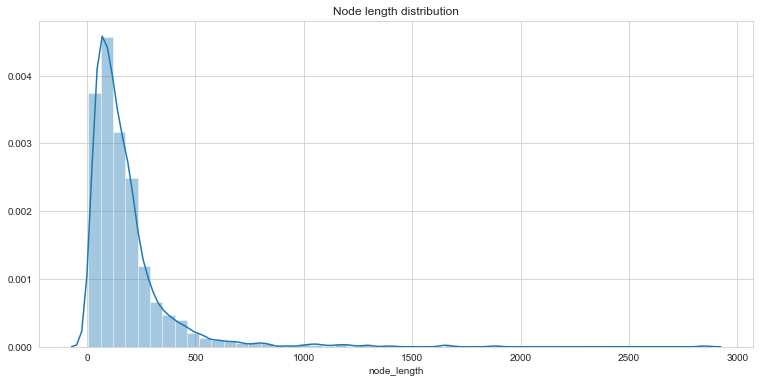

In [43]:
plt.figure(figsize=(12.8,6))
sns.distplot(df['node_length']).set_title('Node length distribution');

In [44]:
df['node_length'].describe()

count    1306.000000
mean      177.658499
std       195.721809
min         6.000000
25%        72.000000
50%       127.000000
75%       210.000000
max      2846.000000
Name: node_length, dtype: float64

Let's remove from the 95% percentile onwards to better appreciate the histogram:

In [45]:
quantile_95 = df['node_length'].quantile(0.95)
df_95 = df[df['node_length'] < quantile_95]

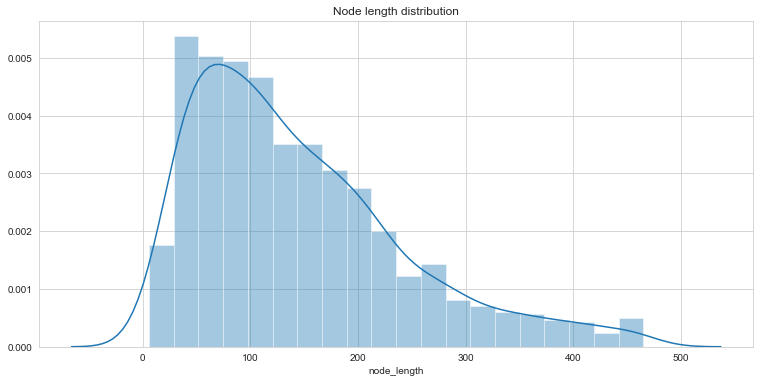

In [46]:
plt.figure(figsize=(12.8,6))
sns.distplot(df_95['node_length']).set_title('Node length distribution');

We can get the number of news articles with more than 1,000 characters:

In [48]:
df_more10k = df[df['node_length'] > 1000]
len(df_more10k)

16

Let's see one:

In [50]:
df_more10k['text'].iloc[0]

'The circulatory system of the lungfish is similer to most fish and maybe humans. It\'s heart does the same thing that the humans do but it goes to the gills of the fish. Plus each and every lungfish has different blood volume and preasure. (Of the small number of species of fish used in studies of the circulation, only a few have been investigated extensively. These include hagfish, dogfish, skate, ratfish, Port Jackson shark, trout, salmon, carp, tench, cod, lingcod, eel, and lungfish. The data have been collected using a variety of techniques under a variety of conditions. In some instances, the fish were not intact and were either out of water, restrained, or anesthetized; in other experiments the recordings were obtained from intact, unanesthetized, and relatively unrestrained fish. The circulatory system is of necessity, very responsive to changes in the environment,) the credits are from https://www.sciencedirect.com/science/article/pii/S1546509808601296 (Link->https://www.scien

It's just a large node.

Let's now plot a boxplot:

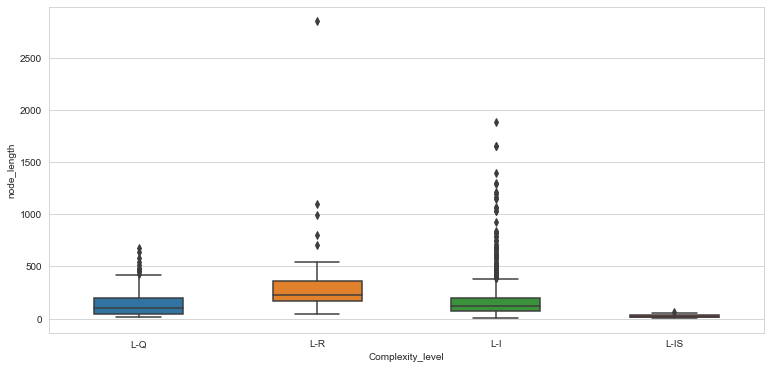

In [51]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df, x='Complexity_level', y='node_length', width=.5);

Now, let's remove the larger documents for better comprehension:

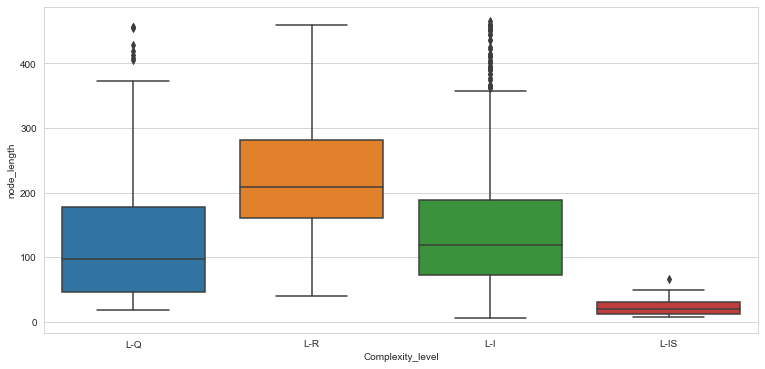

In [52]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df_95, x='Complexity_level', y='node_length');

We can see that, although the length distribution is different for every category, the difference is not too big. If we had way too different lengths between categories we would have a problem since the feature creation process may take into account counts of words. However, when creating the features with TF-IDF scoring, we will normalize the features just to avoid this.

At this point, we cannot do further Exploratory Data Analysis. We'll turn onto the **Feature Engineering** section.

We'll save the dataset:

In [53]:
with open('Train_all_types.pickle', 'wb') as output:
    pickle.dump(df, output)